<a href="https://colab.research.google.com/github/ndkrishna/demo-self-driving/blob/master/R6_ExternalLab_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
%tensorflow_version 1.x 
import tensorflow as tf
tf.random.set_random_seed(42)

In [0]:
tf.__version__

'1.15.0'

### Collect Data

In [0]:
import keras

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. There are 7000 images per class.

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [0]:
print(testY[0:5])

[9 2 1 1 6]


In [0]:
trainX.shape

(60000, 28, 28)

In [0]:
trainY.shape

(60000,)

In [0]:
trainY

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

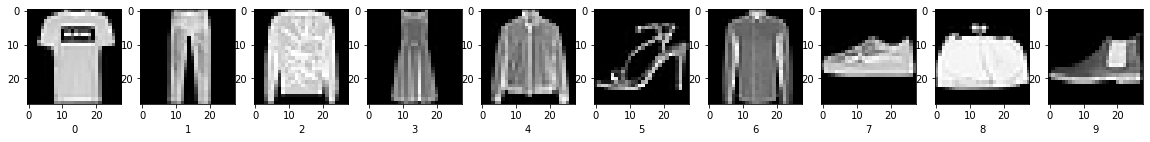

In [0]:
import matplotlib.pyplot as plt
#Trying to understand the data with one picture sample of every class
i = 0
counter = 0
plt.figure(figsize = (20,10))
while i < 10:
    if trainY[counter]==i:
        plt.subplot(1, 10, i+1)
        gray = trainX[counter]
        plt.imshow(gray, cmap = plt.get_cmap(name = 'gray'))
        i = i + 1
        plt.xlabel(trainY[counter])
    counter = counter + 1
plt.show()


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
#One-hot encode the class vector
#convert class vectors (integers) to binary class matrix
#convert trainY and testY
#number of classes: 10
#we are doing this to use categorical_crossentropy as loss

SyntaxError: ignored

In [0]:
trainY_Original = trainY.copy()
testY_Original = trainY.copy()

trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [0]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


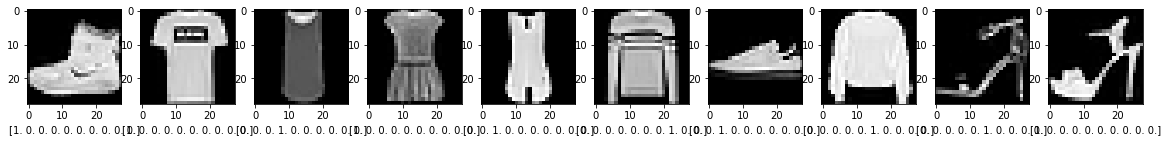

In [0]:
import matplotlib.pyplot as plt
#Trying to understand the data with one picture sample
i = 0
plt.figure(figsize = (20,10))
while i < 10:
    plt.subplot(1, 10, i+1)
    gray = trainX[i]
    plt.imshow(gray, cmap = plt.get_cmap(name = 'gray'))
    i = i + 1
    plt.xlabel(trainY[i])

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Execute the model using model.fit()

In [0]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=5,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.4097 - acc: 0.8567 - val_loss: 0.4716 - val_acc: 0.8384
Epoch 2/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.4103 - acc: 0.8553 - val_loss: 0.4613 - val_acc: 0.8421
Epoch 3/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.4104 - acc: 0.8555 - val_loss: 0.4595 - val_acc: 0.8409
Epoch 4/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.4082 - acc: 0.8573 - val_loss: 0.4792 - val_acc: 0.8394
Epoch 5/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.4083 - acc: 0.8573 - val_loss: 0.4617 - val_acc: 0.8404


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())


# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


### Execute the model

In [0]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=5,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.4075 - acc: 0.8556 - val_loss: 0.4668 - val_acc: 0.8439
Epoch 2/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.4108 - acc: 0.8557 - val_loss: 0.4669 - val_acc: 0.8415
Epoch 3/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.4069 - acc: 0.8572 - val_loss: 0.4663 - val_acc: 0.8397
Epoch 4/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.4089 - acc: 0.8546 - val_loss: 0.4627 - val_acc: 0.8430
Epoch 5/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.4079 - acc: 0.8570 - val_loss: 0.4625 - val_acc: 0.8413


In [0]:
out = model.predict_classes(testX)
print(out)
print(testY_Original)


test_loss, test_acc = model.evaluate(testX, testY)
print('Test accuracy:', test_acc)

[9 2 1 ... 6 1 5]
[9 0 0 ... 3 0 5]
10000/10000 [==============================] - 0s 23us/sample - loss: 1930.8158 - acc: 0.7514
Test accuracy: 0.7514


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
# Comile the model
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=5,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3976 - acc: 0.8600 - val_loss: 0.4599 - val_acc: 0.8414
Epoch 2/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3947 - acc: 0.8611 - val_loss: 0.4674 - val_acc: 0.8436
Epoch 3/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3929 - acc: 0.8606 - val_loss: 0.4795 - val_acc: 0.8433
Epoch 4/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3962 - acc: 0.8617 - val_loss: 0.4692 - val_acc: 0.8432
Epoch 5/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3948 - acc: 0.8606 - val_loss: 0.4742 - val_acc: 0.8435


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())


# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Comile the model
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

### Run the model